In [1]:
import pandas as pd
import numpy as np
import json
from scipy import stats

In [2]:
def entropy(opinions, n, nbins):
    bincounts, bin_edges = np.histogram(opinions, bins = np.linspace(0, 1, nbins))
    probabilities = bincounts/n
    entr = stats.entropy(probabilities)
    return entr

def nodeperc_withininterval(opinions, center, width):
    sortedops = sorted(opinions)
    sortedopsarr = np.array(sortedops)
    withinrange = np.where(np.logical_and(sortedopsarr>=(center-width), sortedopsarr<=(center+width)))
    withinrange = withinrange[0]
    perc = len(withinrange) / len(sortedops)
    return perc

def average_opinions(opinions):
    a = np.array(opinions)
    return np.average(a)

def std_opinions(opinions):
    a = np.array(opinions)
    return np.std(a)

def median_opinions(opinions):
    a = np.array(opinions)
    return np.median(a)




In [2]:
results = pd.read_csv("aggregate/aggregate_results_final_final_final.csv", index_col=[0])
results.head()

,n,density,eps,gam,gam_media,p_media,max_it,media_op,avg_ncluster,std_ncluster,...,10B_avg_entr,10B_std_entr,100B_avg_entr,100B_std_entr,perc_00,perc_005,perc_05,perc_095,avg_opinion,median_opinion
0,100,1.0,0.1,0.00,0.00,0.1,1000000,0.05;0.5;0.95,4.335848,0.550327,...,1.525552,0.118379,1.525552,0.118379,NaN,0.0816,0.1278,0.0885,0.500391,0.512610
1,100,1.0,0.1,0.50,0.50,0.1,1000000,0.05;0.5;0.95,5.111224,0.609606,...,2.153097,0.235560,2.153097,0.235560,NaN,0.1355,0.1919,0.1251,0.501082,0.498484
2,100,1.0,0.1,0.75,0.75,0.1,1000000,0.05;0.5;0.95,5.284581,0.596961,...,2.220887,0.230256,2.220887,0.230256,NaN,0.1366,0.1948,0.1386,0.499976,0.511280
3,100,1.0,0.1,1.00,1.00,0.1,1000000,0.05;0.5;0.95,5.532513,0.601132,...,2.306110,0.214404,2.306110,0.214404,NaN,0.1240,0.1829,0.1372,0.497835,0.496840
4,100,1.0,0.1,1.25,1.25,0.1,1000000,0.05;0.5;0.95,5.636583,0.718927,...,2.346602,0.217108,2.346602,0.217108,NaN,0.1233,0.1638,0.1281,0.502963,0.502041


In [51]:
averageops = []
averagestdops = []
averagemedianops = []

for index, row in results.iterrows():
    media_op = ', '.join(str(el) for el in row['media_op'].split(';'))
    mo = f'[{media_op}]'
    eps = row['eps']
    gam = row['gam']
    p_media = row['p_media']
    name = f'media mo{mo} p{p_media} e{eps} g{gam} gm{gam} mi1000000'
    print(f'doing {name}')
    jsonfile = open(f'aggregate/final_opinions {name}.json')
    data = json.load(jsonfile)
    avgarray = []
    stdarray = []
    medarray = []
    for nr in data.keys():
        finalops = list(data[nr])
        avg = average_opinions(finalops)
        med = median_opinions(finalops)
        std = std_opinions(finalops)
        avgarray.append(avg)
        medarray.append(med)
        stdarray.append(std)
    avgarray = np.array(avgarray)
    medarray = np.array(medarray)
    stdarray = np.array(stdarray)
    averageops.append(np.average(avgarray))
    averagestdops.append(np.average(stdarray))
    averagemedianops.append(np.average(medarray))

doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.3 g1.

In [52]:
values_avg = []
values_std = []

for index, row in results.iterrows():
    media_op = ', '.join(str(el) for el in row['media_op'].split(';'))
    mo = f'[{media_op}]'
    eps = row['eps']
    gam = row['gam']
    p_media = row['p_media']
    name = f'media mo{mo} p{p_media} e{eps} g{gam} gm{gam} mi1000000'
    print(f'doing {name}')
    jsonfile = open(f'aggregate/final_opinions {name}.json')
    data = json.load(jsonfile)
    entrarray = []
    for nr in data.keys():
        finalops = list(data[nr])
        entr = entropy(finalops, 100, 101)
        entrarray.append(entr)
    entrarray = np.array(entrarray)
    values_avg.append(np.average(entrarray))
    values_std.append(np.std(entrarray))

values_avg_2 = []
values_std_2 = []

for index, row in results.iterrows():
    media_op = ', '.join(str(el) for el in row['media_op'].split(';'))
    mo = f'[{media_op}]'
    eps = row['eps']
    gam = row['gam']
    p_media = row['p_media']
    name = f'media mo{mo} p{p_media} e{eps} g{gam} gm{gam} mi1000000'
    print(f'doing {name}')
    jsonfile = open(f'aggregate/final_opinions {name}.json')
    data = json.load(jsonfile)
    entrarray = []
    for nr in data.keys():
        finalops = list(data[nr])
        entr = entropy(finalops, 100, 101)
        entrarray.append(entr)
    entrarray = np.array(entrarray)
    values_avg_2.append(np.average(entrarray))
    values_std_2.append(np.std(entrarray))

doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.3 g1.

In [53]:
perc_00 = []

for index, row in results.iterrows():
    if row['media_op']=='0.05;0.5;0.95':
        perc_00.append(None)
    else:
        media_op = ', '.join(str(el) for el in row['media_op'].split(';'))
        mo = f'[{media_op}]'
        eps = row['eps']
        gam = row['gam']
        p_media = row['p_media']
        name = f'media mo{mo} p{p_media} e{eps} g{gam} gm{gam} mi1000000'
        print(f'doing {name}')
        jsonfile = open(f'aggregate/final_opinions {name}.json')
        data = json.load(jsonfile)
        percarray = []
        for nr in data.keys():
            finalops = list(data[nr])
            perc = nodeperc_withininterval(finalops, 0.0, 0.001)
            percarray.append(perc)
        percarray = np.array(percarray)
        perc_00.append(np.average(percarray))

doing media mo[0.0] p0.0 e0.1 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.0 e0.1 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.0 e0.1 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.0 e0.1 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.0 e0.1 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.0 e0.1 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.0 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.0 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.0 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.0 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.0 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.0 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.0 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.0 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.0 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.0 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.0 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.0 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.0 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.0]

In [54]:
perc_005 = []

for index, row in results.iterrows():
    if row['media_op']=="0.0":
        perc_005.append(None)
    else:
        media_op = ', '.join(str(el) for el in row['media_op'].split(';'))
        mo = f'[{media_op}]'
        eps = row['eps']
        gam = row['gam']
        p_media = row['p_media']
        name = f'media mo{mo} p{p_media} e{eps} g{gam} gm{gam} mi1000000'
        print(f'doing {name}')
        jsonfile = open(f'aggregate/final_opinions {name}.json')
        data = json.load(jsonfile)
        percarray = []
        for nr in data.keys():
            finalops = list(data[nr])
            perc = nodeperc_withininterval(finalops, 0.05, 0.001)
            percarray.append(perc)
        percarray = np.array(percarray)
        perc_005.append(np.average(percarray))

doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.3 g1.

In [55]:
perc_05 = []

for index, row in results.iterrows():
    if row['media_op']=="0.0":
        perc_05.append(None)
    else:
        media_op = ', '.join(str(el) for el in row['media_op'].split(';'))
        mo = f'[{media_op}]'
        eps = row['eps']
        gam = row['gam']
        p_media = row['p_media']
        name = f'media mo{mo} p{p_media} e{eps} g{gam} gm{gam} mi1000000'
        print(f'doing {name}')
        jsonfile = open(f'aggregate/final_opinions {name}.json')
        data = json.load(jsonfile)
        percarray = []
        for nr in data.keys():
            finalops = list(data[nr])
            perc = nodeperc_withininterval(finalops, 0.5, 0.001)
            percarray.append(perc)
        percarray = np.array(percarray)
        perc_05.append(np.average(percarray))

doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.3 g1.

In [56]:
perc_095 = []

for index, row in results.iterrows():
    if row['media_op']=="0.0":
        perc_095.append(None)
    else:
        media_op = ', '.join(str(el) for el in row['media_op'].split(';'))
        mo = f'[{media_op}]'
        eps = row['eps']
        gam = row['gam']
        p_media = row['p_media']
        name = f'media mo{mo} p{p_media} e{eps} g{gam} gm{gam} mi1000000'
        print(f'doing {name}')
        jsonfile = open(f'aggregate/final_opinions {name}.json')
        data = json.load(jsonfile)
        percarray = []
        for nr in data.keys():
            finalops = list(data[nr])
            perc = nodeperc_withininterval(finalops, 0.95, 0.001)
            percarray.append(perc)
        percarray = np.array(percarray)
        perc_095.append(np.average(percarray))

doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.1 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.1 e0.3 g1.

In [57]:
#manca da fare questa cosa quando adjustNC ha finito
results["10B_avg_entr"] = values_avg
results["10B_std_entr"] = values_std

In [58]:
results["100B_avg_entr"] = values_avg_2
results["100B_std_entr"] = values_std_2

In [59]:
results['perc_00'] = perc_00
results['perc_005'] = perc_005
results['perc_05'] = perc_05
results['perc_095'] = perc_095

In [60]:
results["avg_opinion"] = averageops
results["median_opinion"] = averagemedianops


In [61]:
results

,n,density,eps,gam,gam_media,p_media,max_it,media_op,avg_ncluster,std_ncluster,...,10B_avg_entr,10B_std_entr,100B_avg_entr,100B_std_entr,perc_00,perc_005,perc_05,perc_095,avg_opinion,median_opinion
0,100,1.0,0.1,0.00,0.00,0.1,1000000,0.05;0.5;0.95,4.335848,0.550327,...,1.525552,0.118379,1.525552,0.118379,NaN,0.0816,0.1278,0.0885,0.500391,0.512610
1,100,1.0,0.1,0.50,0.50,0.1,1000000,0.05;0.5;0.95,5.111224,0.609606,...,2.153097,0.235560,2.153097,0.235560,NaN,0.1355,0.1919,0.1251,0.501082,0.498484
2,100,1.0,0.1,0.75,0.75,0.1,1000000,0.05;0.5;0.95,5.284581,0.596961,...,2.220887,0.230256,2.220887,0.230256,NaN,0.1366,0.1948,0.1386,0.499976,0.511280
3,100,1.0,0.1,1.00,1.00,0.1,1000000,0.05;0.5;0.95,5.532513,0.601132,...,2.306110,0.214404,2.306110,0.214404,NaN,0.1240,0.1829,0.1372,0.497835,0.496840
4,100,1.0,0.1,1.25,1.25,0.1,1000000,0.05;0.5;0.95,5.636583,0.718927,...,2.346602,0.217108,2.346602,0.217108,NaN,0.1233,0.1638,0.1281,0.502963,0.502041
5,100,1.0,0.1,1.50,1.50,0.1,1000000,0.05;0.5;0.95,5.798788,0.655022,...,2.399413,0.228995,2.399413,0.228995,NaN,0.1209,0.1758,0.1251,0.499950,0.502889
6,100,1.0,0.2,0.00,0.00,0.1,1000000,0.05;0.5;0.95,2.328089,0.432604,...,0.884670,0.170760,0.884670,0.170760,NaN,0.1829,0.1791,0.0792,0.504259,0.477987
7,100,1.0,0.2,0.50,0.50,0.1,1000000,0.05;0.5;0.95,2.509680,0.402311,...,1.005706,0.166208,1.005706,0.166208,NaN,0.2111,0.3533,0.1951,0.499034,0.506048
8,100,1.0,0.2,0.75,0.75,0.1,1000000,0.05;0.5;0.95,2.585506,0.383074,...,1.050293,0.169933,1.050293,0.169933,NaN,0.1972,0.3643,0.2068,0.499163,0.488872
9,100,1.0,0.2,1.00,1.00,0.1,1000000,0.05;0.5;0.95,2.616180,0.426700,...,1.085780,0.207239,1.085780,0.207239,NaN,0.2266,0.3703,0.2042,0.485844,0.495359


In [62]:
results.to_csv("aggregate/aggregate_results_final_final_final.csv")

In [3]:
results.head()

,n,density,eps,gam,gam_media,p_media,max_it,media_op,avg_ncluster,std_ncluster,...,10B_avg_entr,10B_std_entr,100B_avg_entr,100B_std_entr,perc_00,perc_005,perc_05,perc_095,avg_opinion,median_opinion
0,100,1.0,0.1,0.00,0.00,0.1,1000000,0.05;0.5;0.95,4.335848,0.550327,...,1.525552,0.118379,1.525552,0.118379,NaN,0.0816,0.1278,0.0885,0.500391,0.512610
1,100,1.0,0.1,0.50,0.50,0.1,1000000,0.05;0.5;0.95,5.111224,0.609606,...,2.153097,0.235560,2.153097,0.235560,NaN,0.1355,0.1919,0.1251,0.501082,0.498484
2,100,1.0,0.1,0.75,0.75,0.1,1000000,0.05;0.5;0.95,5.284581,0.596961,...,2.220887,0.230256,2.220887,0.230256,NaN,0.1366,0.1948,0.1386,0.499976,0.511280
3,100,1.0,0.1,1.00,1.00,0.1,1000000,0.05;0.5;0.95,5.532513,0.601132,...,2.306110,0.214404,2.306110,0.214404,NaN,0.1240,0.1829,0.1372,0.497835,0.496840
4,100,1.0,0.1,1.25,1.25,0.1,1000000,0.05;0.5;0.95,5.636583,0.718927,...,2.346602,0.217108,2.346602,0.217108,NaN,0.1233,0.1638,0.1281,0.502963,0.502041


In [15]:
from sklearn.preprocessing import MinMaxScaler


results_scaled = results.copy()

# apply normalization techniques by Column 1
column = '100B_avg_entr'
results["100B_avg_entr_norm"] = MinMaxScaler().fit_transform(np.array(results_scaled[column]).reshape(-1,1))


In [16]:
results_scaled.head()   

,n,density,eps,gam,gam_media,p_media,max_it,media_op,avg_ncluster,std_ncluster,...,10B_std_entr,100B_avg_entr,100B_std_entr,perc_00,perc_005,perc_05,perc_095,avg_opinion,median_opinion,10B_avg_entr_norm
0,100,1.0,0.1,0.00,0.00,0.1,1000000,0.05;0.5;0.95,4.335848,0.550327,...,0.118379,1.525552,0.118379,NaN,0.0816,0.1278,0.0885,0.500391,0.512610,0.444352
1,100,1.0,0.1,0.50,0.50,0.1,1000000,0.05;0.5;0.95,5.111224,0.609606,...,0.235560,2.153097,0.235560,NaN,0.1355,0.1919,0.1251,0.501082,0.498484,0.627139
2,100,1.0,0.1,0.75,0.75,0.1,1000000,0.05;0.5;0.95,5.284581,0.596961,...,0.230256,2.220887,0.230256,NaN,0.1366,0.1948,0.1386,0.499976,0.511280,0.646884
3,100,1.0,0.1,1.00,1.00,0.1,1000000,0.05;0.5;0.95,5.532513,0.601132,...,0.214404,2.306110,0.214404,NaN,0.1240,0.1829,0.1372,0.497835,0.496840,0.671708
4,100,1.0,0.1,1.25,1.25,0.1,1000000,0.05;0.5;0.95,5.636583,0.718927,...,0.217108,2.346602,0.217108,NaN,0.1233,0.1638,0.1281,0.502963,0.502041,0.683502


In [17]:
results["100B_avg_entr_norm"].min()

0.0

In [18]:
results["100B_avg_entr_norm"].max()

0.9999999999999999

In [19]:
results.to_csv("aggregate/aggregate_results_final_final_final_final.csv")

In [28]:
polarization = results[(results.new_avg_ncluster >= 1.5) & (results.new_avg_ncluster<=2.5)]

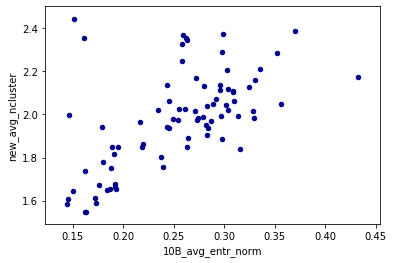

In [36]:
polarization[['10B_avg_entr_norm', 'new_avg_ncluster']]
polarization.plot.scatter(x='10B_avg_entr_norm', y='new_avg_ncluster', c='DarkBlue')

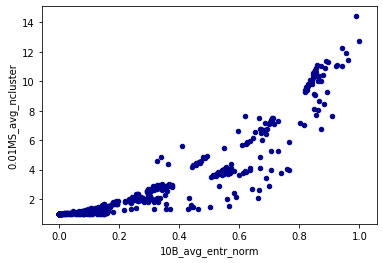

In [38]:
results.plot.scatter(x='10B_avg_entr_norm', y='0.01MS_avg_ncluster', c='DarkBlue')

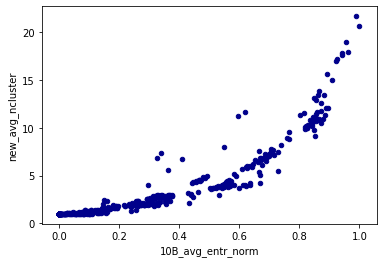

In [39]:
results.plot.scatter(x='10B_avg_entr_norm', y='new_avg_ncluster', c='DarkBlue')